# Pardi Octaviando
# 122450132
## Ujian Praktikum Pembelajaran Mesin
## Senin 2 Desember 2024


## Soal 1

## Soal 2

## Soal 1

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score

np.random.seed(42)

X = np.random.rand(100, 2) * 10
y_linear = 3 * X[:, 0] + 2 * X[:, 1] + 5 + np.random.randn(100) * 2
y_logistic = (X[:, 0] + X[:, 1] > 10).astype(int)
X_train, X_test, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.2,
random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_linear)

y_pred_linear = lin_reg.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test_linear, y_pred_linear))

X_train, X_test, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic,
test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_logistic)

y_pred_logistic = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test_logistic, y_pred_logistic))



Linear Regression R2 Score: 0.9611277038272865
Logistic Regression Accuracy: 0.95


## Soal 2

In [23]:
import numpy as np

# Dataset
dataC = np.array([
  ['Murah', 'Dekat', 'Tidak', 'Ya'],
  ['Sedang', 'Dekat', 'Tidak', 'Ya'],
  ['Mahal', 'Dekat', 'Tidak', 'Ya'],
  ['Mahal', 'Jauh', 'Tidak', 'Tidak'],
  ['Mahal', 'Sedang', 'Tidak', 'Tidak'],
  ['Sedang', 'Jauh', 'Ada', 'Tidak'],
  ['Murah', 'Jauh', 'Ada', 'Tidak'],
  ['Murah', 'Sedang', 'Tidak', 'Ya'],
  ['Mahal', 'Jauh', 'Ada', 'Tidak'],
  ['Sedang', 'Sedang', 'Ada', 'Ya' ]
])

#Hitung probabilitas prior
def calculate_prior(dataC):
  total = len(dataC)
  ya_count = sum(1 for row in dataC if row[-1] == 'Ya')
  tidak_count= total-  ya_count
  return ya_count / total, tidak_count / total

# Hitung probabilitas kondisional untuk fitur kategori
def calculate_categorical_prob(dataC, feature_index, value, target_value):
  filtered_data =[row for row in dataC if row[-1]==target_value]
  count = sum(1 for row in filtered_data if row[feature_index] ==value)
  return count / len(filtered_data) if len(filtered_data) > 0 else 0

#Klasifikasi Naive Bayes
def naive_bayes_predict(datać, harga, jarak, angkutan):
  prior_ya, prior_tidak =calculate_prior(dataC)

  #Probabilitas kondisional untuk Ya
  p_harga_ya = calculate_categorical_prob(dataC, 0, harga, 'Ya')
  p_jarak_ya = calculate_categorical_prob(dataC, 1, jarak, 'Ya')
  p_angkutan_ya =calculate_categorical_prob(dataC, 2, angkutan, 'Ya')

  # Probabilitas kondisional untuk Tidak
  p_harga_tidak = calculate_categorical_prob(dataC, 0, harga, 'Tidak')
  p_jarak_tidak = calculate_categorical_prob(dataC, 1, jarak, 'Tidak')
  p_angkutan_tidak = calculate_categorical_prob(dataC, 2, angkutan, 'Tidak')

  #Posterior untuk Ya dan Tidak
  p_ya = prior_ya * p_harga_ya * p_angkutan_ya * p_jarak_ya
  p_tidak = prior_tidak * p_harga_tidak * p_angkutan_tidak * p_jarak_tidak
  return 'Ya' if p_ya > p_tidak else 'Tidak', p_ya, p_tidak

# Prediksi untuk harga "Mahal", jarak "Sedang", dan angkutan "Ada"
prediction = naive_bayes_predict(dataC, 'Mahal', 'Sedang', 'Ada')
prediction

# Hitung distribusi Gaussian untuk fitur numerik
def calculate_gaussian_prob(x, mean, std):
    exponent = exp(-((x - mean) ** 2 / (2 * (std )**2)))
    return (1 / (sqrt(2 * pi) * std)) * exponent

# Hitung mean dan std dev untuk fitur numerik
def calculate_numerical_stats(data, feature_index, target_value):
    filtered_data = [row[feature_index] for row in data if row[-1] == target_value]

    mean = np.mean(filtered_data)
    std = np.std(filtered)
    return mean, std




## Soal 3

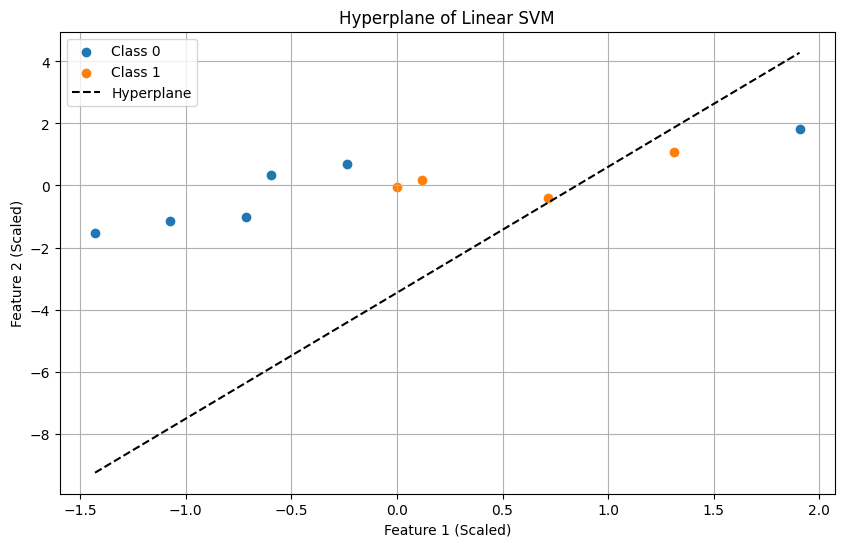

Prediksi churn untuk data baru: 0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Dataset
data = np.array([
    [25, 3000, 12, 0],
    [34, 4500, 24, 1],
    [29, 5000, 36, 0],
    [45, 6000, 6, 1],
    [32, 5500, 18, 0],
    [50, 7000, 48, 0],
    [40, 4000, 8, 1],
    [28, 3200, 14, 0],
    [35, 4800, 30, 1],
    [22, 2500, 10, 0]
])


# Fitur dan label
X = data[:, :-1]
y = data[:, -1]

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model SVM dengan kernel linear
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_scaled, y)

# Menampilkan hyperplane
def plot_hyperplane(X, y, model):
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {int(label)}")

    # Plot hyperplane
    w = model.coef_[0]
    b = model.intercept_[0]
    x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_plot = -(w[0] * x_plot + b) / w[1]
    plt.plot(x_plot, y_plot, 'k--', label="Hyperplane")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.legend()
    plt.title("Hyperplane of Linear SVM")
    plt.grid()
    plt.show()

# Plotkan hyperplane
plot_hyperplane(X_scaled[:, :2], y, svm_model)

# Prediksi data baru
new_data = np.array([[35, 4700, 23]])
new_data_scaled = scaler.transform(new_data)
prediction = svm_model.predict(new_data_scaled)
print("Prediksi churn untuk data baru:", prediction[0])


## Soal 4

In [15]:
import numpy as np

# Koordinat titik-titik
points = np.array([
    [2, 4], [4, 2], [3, 3], [5, 5], [6, 7], [8, 6], [7, 3], [9, 4]
])

# Kasus 1: Centroid awal (G(2,2), H(3,2))
centroids_case1 = np.array([[2, 2], [3, 2]])

# Kasus 2: Centroid awal (G(3,3), H(4,3))
centroids_case2 = np.array([[3, 3], [4, 3]])

def k_means(points, centroids, iterations=1):
    for _ in range(iterations):
        # Hitung jarak Euclidean ke setiap centroid
        distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)

        # Kelompokkan berdasarkan jarak terdekat
        labels = np.argmin(distances, axis=1)

        # Hitung centroid baru
        new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(len(centroids))])

        # Perbarui centroid
        centroids = new_centroids

    return centroids, labels

# Kasus 1
centroids_case1_final, labels_case1 = k_means(points, centroids_case1)
print("Hasil Kasus 1:")
print("Centroid Baru:", centroids_case1_final)
print("Kelompok:", labels_case1)

# Kasus 2
centroids_case2_final, labels_case2 = k_means(points, centroids_case2)
print("\nHasil Kasus 2:")
print("Centroid Baru:", centroids_case2_final)
print("Kelompok:", labels_case2)


Hasil Kasus 1:
Centroid Baru: [[2.         4.        ]
 [6.         4.28571429]]
Kelompok: [0 1 1 1 1 1 1 1]

Hasil Kasus 2:
Centroid Baru: [[2.5 3.5]
 [6.5 4.5]]
Kelompok: [0 1 0 1 1 1 1 1]


## Soal 5

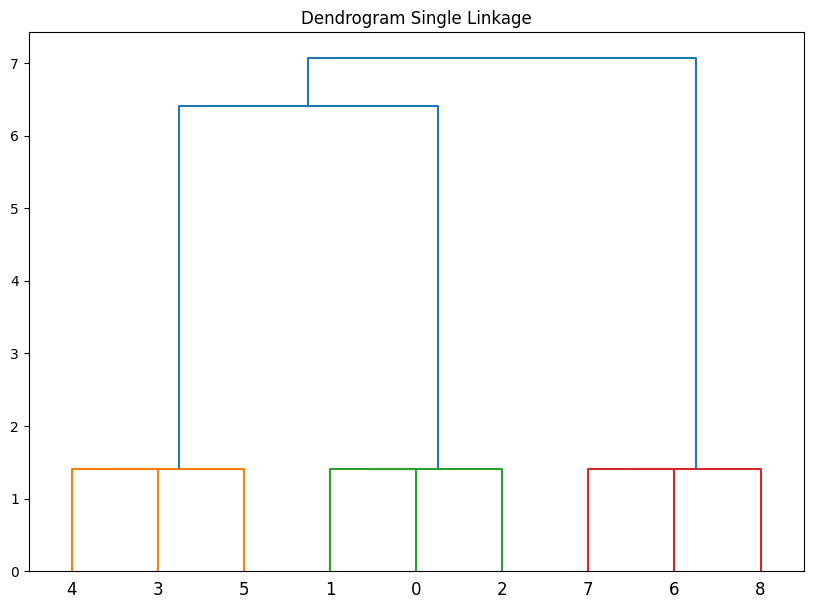

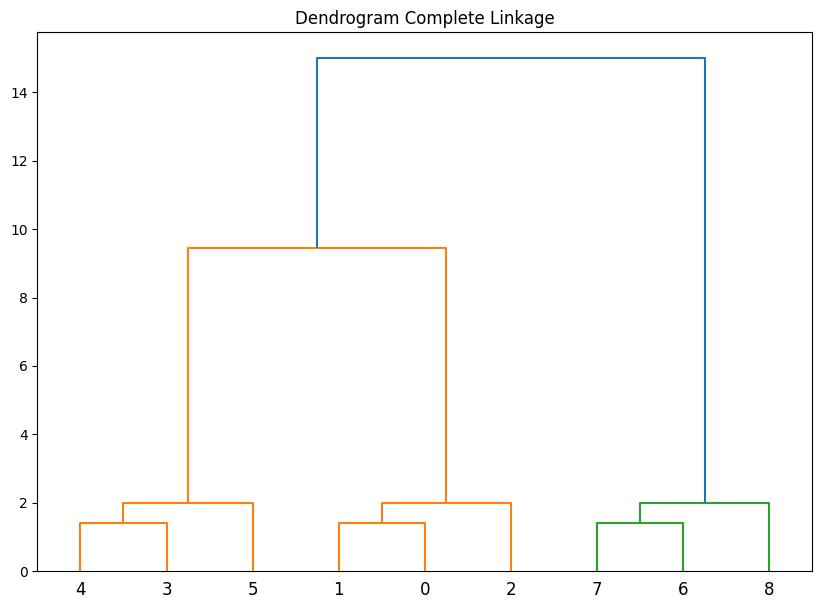

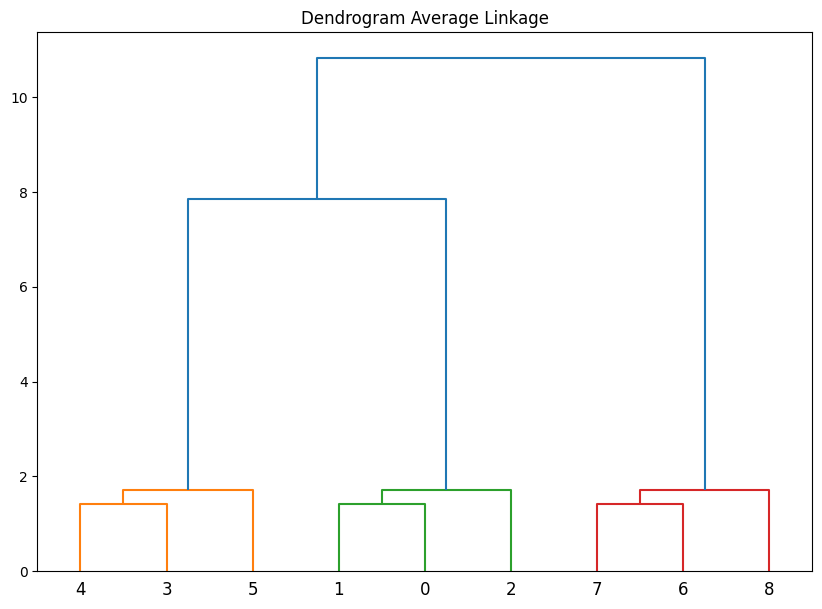

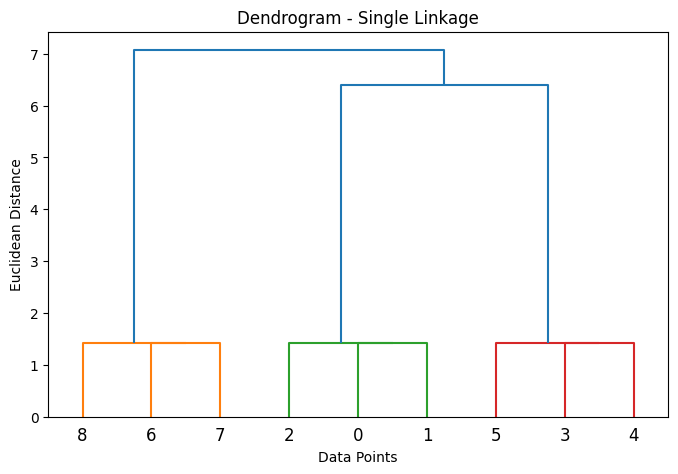

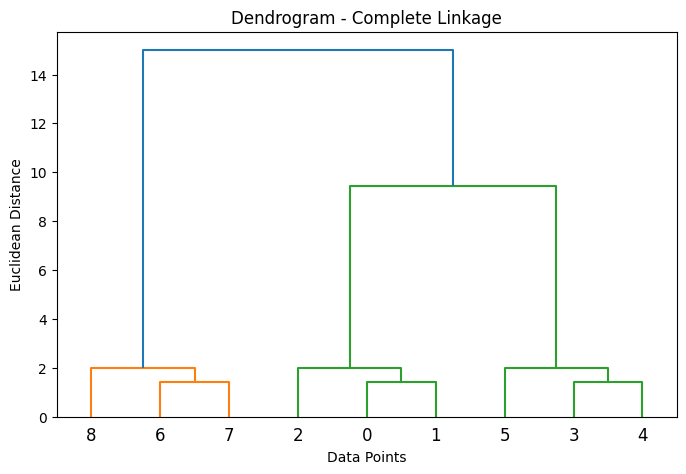

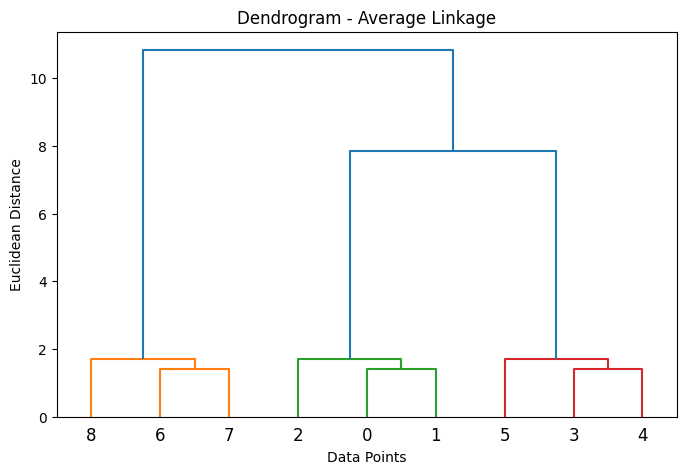

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Data yang diberikan
data = np.array([
    (2, 2), (3, 3), (4, 2), (8, 7), (9, 8), (10, 7), (15, 2), (16, 3), (17, 2)
])

# Menghitung matriks linkage menggunakan single linkage
linked_single = linkage(data, 'single')

# Menghitung matriks linkage menggunakan complete linkage
linked_complete = linkage(data, 'complete')

# Menghitung matriks linkage menggunakan average linkage
linked_average = linkage(data, 'average')

# Plot dendrogram untuk single linkage
plt.figure(figsize=(10, 7))
dendrogram(linked_single,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram Single Linkage')
plt.show()

# Plot dendrogram untuk complete linkage
plt.figure(figsize=(10, 7))
dendrogram(linked_complete,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram Complete Linkage')
plt.show()

# Plot dendrogram untuk average linkage
plt.figure(figsize=(10, 7))
dendrogram(linked_average,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram Average Linkage')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Data yang diberikan
data = np.array([
    [2, 2], [3, 3], [4, 2],
    [8, 7], [9, 8], [10, 7],
    [15, 2], [16, 3], [17, 2]
])

# Fungsi untuk menampilkan dendrogram berdasarkan metode linkage yang berbeda
def plot_dendrogram(data, method, title):
    Z = linkage(data, method=method, metric='euclidean')
    plt.figure(figsize=(8, 5))
    dendrogram(Z)
    plt.title(f"Dendrogram - {title}")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    plt.show()
    return Z

# Generate dendrogram untuk masing-masing metode linkage
linkage_methods = ['single', 'complete', 'average']
dendrogram_titles = ["Single Linkage", "Complete Linkage", "Average Linkage"]
Z_single = plot_dendrogram(data, 'single', dendrogram_titles[0])
Z_complete = plot_dendrogram(data, 'complete', dendrogram_titles[1])
Z_average = plot_dendrogram(data, 'average', dendrogram_titles[2])


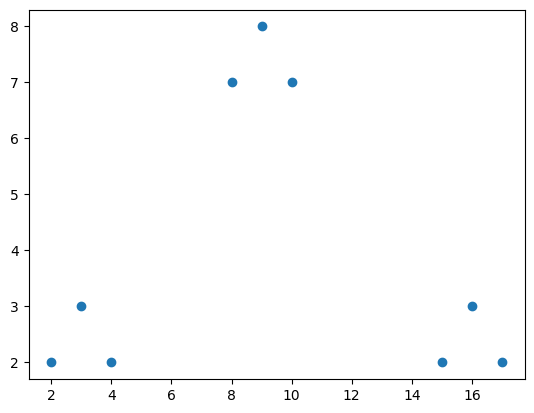

[0 0 0 0 0 0 1 1 1]


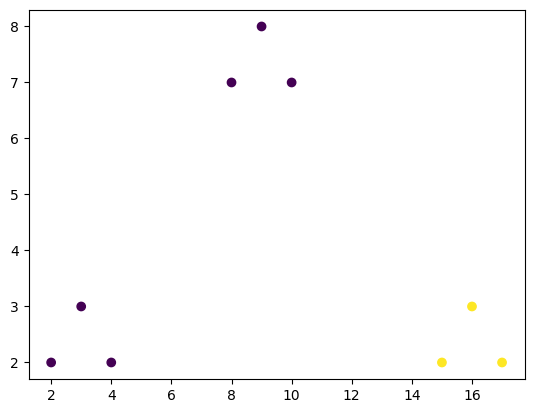

FileNotFoundError: [Errno 2] No such file or directory: '/content/data.xlsx'

In [16]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Mendefinisikan ulang data koordinat x dan y
data = np.array([
    [2, 2], [3, 3], [4, 2],
    [8, 7], [9, 8], [10, 7],
    [15, 2], [16, 3], [17, 2]
])

# Extract x and y coordinates from data
x = data[:, 0]  # Get the first column (x-coordinates)
y = data[:, 1]  # Get the second column (y-coordinates)

# Menampilkan data dalam bentuk scatter plot untuk memvisualisasikan titik-titik data
plt.scatter(x, y)
plt.show()

# Melakukan Agglomerative Clustering dengan jumlah kluster 2 dan metode linkage 'complete'
# AgglomerativeClustering adalah algoritma hierarchical clustering dari Scikit-learn
# Untuk 'complete' linkage, 'affinity' secara default adalah 'euclidean' (tidak perlu diset secara manual)
hirearchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
hirearchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
hirearchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')
# Melakukan clustering pada data dan mendapatkan label dari setiap titik data
labels = hirearchical_cluster.fit_predict(data)
print(labels)  # Mencetak label kluster dari setiap titik data

# Menampilkan scatter plot dari data dengan pewarnaan berdasarkan label kluster
# Titik data akan diberi warna sesuai dengan kluster yang dihasilkan
plt.scatter(x, y, c=hirearchical_cluster.labels_) # Use extracted x and y
plt.show()


## 3

!pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
# Import the pandas library and give it an alias of 'pd'
import pandas as pd

# Read the Excel file using pd.read_excel
pd_data = pd.read_excel("/content/data.xlsx")  # Use pd.read_excel for Excel files

# Assuming your data is in columns named 'x' and 'y'
x = pd_data['x'].values  # Extract x values
y = pd_data['y'].values  # Extract y values

# Define the data for clustering
data = np.array(list(zip(x, y)))  # Combine x and y into a NumPy array

# Menampilkan data dalam bentuk scatter plot untuk memvisualisasikan titik-titik data
plt.scatter(x, y)
plt.show()

# Melakukan Agglomerative Clustering dengan jumlah kluster 2 dan metode linkage 'complete'
# AgglomerativeClustering adalah algoritma hierarchical clustering dari Scikit-learn
# Untuk 'complete' linkage, 'affinity' secara default adalah 'euclidean' (tidak perlu diset secara manual)
hirearchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')

# Melakukan clustering pada data dan mendapatkan label dari setiap titik data
labels = hirearchical_cluster.fit_predict(data)
print(labels)  # Mencetak label kluster dari setiap titik data

# Menampilkan scatter plot dari data dengan pewarnaan berdasarkan label kluster
# Titik data akan diberi warna sesuai dengan kluster yang dihasilkan
plt.scatter(x, y, c=hirearchical_cluster.labels_)
plt.show()

## Soal 6


In [9]:
# 1) Import pustaka atau library yang akan digunakan
import numpy as np  # Mengimpor library NumPy untuk operasi numerik

# 2) Masukkan dataset yang akan digunakan.
data = np.array([
    [2.5, 2.4, 3.5, 3.6],
    [0.5, 0.7, 1.2, 1.3],
    [2.2, 2.9, 3.0, 3.4],
    [1.9, 2.2, 2.5, 2.7],
    [3.1, 3.6, 4.1, 4.0],
    [2.3, 2.7, 3.1, 3.0],
    [2.0, 1.6, 2.3, 2.4],
    [1.0, 1.1, 1.5, 1.6],
    [1.5, 1.6, 2.0, 2.1],
    [1.1, 0.9, 1.3, 1.4]
])  # Membuat array NumPy untuk menyimpan data

# 3) Lakukan standarisasi data.
mean = np.mean(data, axis=0)  # Menghitung rata-rata (mean) dari setiap kolom
std_dev = np.std(data, axis=0)  # Menghitung standar deviasi dari setiap kolom
Z = (data - mean) / std_dev  # Melakukan standarisasi data (Z-score normalization)

# 4) Hitung matriks kovarian dari Z.
cov_matrix = np.cov(Z, rowvar=False)  # Menghitung matriks kovarian dari data yang telah distandarisasi

# 5) Hitung nilai eigen dan vektor eigen dari matriks kovarian cov_matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Menghitung nilai eigen dan vektor eigen

# 6) Hitung proporsi variansi dari nilai eigen
total_variance = np.sum(eigenvalues)  # Menghitung total variansi dari semua nilai eigen
explained_variance_ratio = eigenvalues / total_variance  # Menghitung proporsi variansi yang dijelaskan oleh setiap PC

# 7) Hitung kontribusi variansi dari nilai eigen
cumulative_variance = np.cumsum(explained_variance_ratio)  # Menghitung variansi kumulatif

# Tampilkan hasil
print("Nilai Eigen:", eigenvalues)
print("Proporsi Variansi dari setiap komponen:", explained_variance_ratio)
print("Kontribusi Variansi Kumulatif:", cumulative_variance)

# 8) Tentukan ambang batas atau threshold dalam pemilihan nilai eigen
# Biasanya diatas 70%
threshold = 0.90  # Menetapkan ambang batas (threshold) untuk pemilihan PC
n_components = np.argmax(cumulative_variance >= threshold) + 1  # Menentukan jumlah PC berdasarkan threshold
print(n_components)  # Menampilkan jumlah komponen

# 9) Urutkan nilai dan vektor eigen
sorted_indices = np.argsort(eigenvalues)[::-1]  # Mengurutkan indeks nilai eigen dari yang terbesar
sorted_eigenvalues = eigenvalues[sorted_indices]  # Mengurutkan nilai eigen
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Mengurutkan vektor eigen

# 10) Ambil komponen sesuai n_components sebelumnya.
n_components = 1  # Menetapkan jumlah komponen utama yang akan digunakan
W = sorted_eigenvectors[:, :n_components]  # Mengambil vektor eigen yang sesuai

# 11) Lakukan transformasi data
Y = Z @ W  # Melakukan transformasi data dengan mengalikan data standar (Z) dengan matriks vektor eigen (W)

# 12) Tampilkan hasil reduksi data PCA
print("Data setelah PCA:")  # Menampilkan judul output
print(Y)  # Menampilkan data yang telah direduksi dimensinya

Nilai Eigen: [4.33318943 0.06538576 0.0358081  0.01006116]
Proporsi Variansi dari setiap komponen: [0.97496762 0.0147118  0.00805682 0.00226376]
Kontribusi Variansi Kumulatif: [0.97496762 0.98967942 0.99773624 1.        ]
1
Data setelah PCA:
[[-1.85364122]
 [ 2.95159575]
 [-1.54579331]
 [-0.29769242]
 [-3.46574526]
 [-1.33423136]
 [ 0.24222221]
 [ 2.066633  ]
 [ 0.90644968]
 [ 2.33020293]]


In [8]:
# 1) Import pustaka atau library yang akan digunakan
import numpy as np  # Mengimpor library NumPy untuk operasi numerik

# 2) Masukkan data yang akan direduksi
X = np.array([
    [2.5, 2.4, 3.5, 3.6],
    [0.5, 0.7, 1.2, 1.3],
    [2.2, 2.9, 3.0, 3.4],
    [1.9, 2.2, 2.5, 2.7],
    [3.1, 3.6, 4.1, 4.0],
    [2.3, 2.7, 3.1, 3.0],
    [2.0, 1.6, 2.3, 2.4],
    [1.0, 1.1, 1.5, 1.6],
    [1.5, 1.6, 2.0, 2.1],
    [1.1, 0.9, 1.3, 1.4]
])  # Membuat array NumPy untuk menyimpan data

# 3) Lakukan standarisasi data menggunakan StandardScaler dari library sklearn
from sklearn.preprocessing import StandardScaler  # Mengimpor StandardScaler dari sklearn.preprocessing
scaler = StandardScaler()  # Membuat objek StandardScaler
X_scaled = scaler.fit_transform(X)  # Melakukan standarisasi data

# 4) Lakukan reduksi dimensi menggunakan PCA dari library sklearn
from sklearn.decomposition import PCA  # Mengimpor PCA dari sklearn.decomposition
pca = PCA(n_components=1)  # Membuat objek PCA dengan 1 komponen utama
X_pca = pca.fit_transform(X_scaled)  # Melakukan reduksi dimensi

# 5) Tampilkan hasil reduksi PCA menggunakan sklearn
print("Data setelah PCA:")  # Menampilkan judul output
print(X_pca)  # Menampilkan data yang telah direduksi dimensinya

Data setelah PCA:
[[ 1.85364122]
 [-2.95159575]
 [ 1.54579331]
 [ 0.29769242]
 [ 3.46574526]
 [ 1.33423136]
 [-0.24222221]
 [-2.066633  ]
 [-0.90644968]
 [-2.33020293]]


## Soal 7

In [7]:
import numpy as np  # Mengimpor pustaka numpy, yang menyediakan fungsi matematika tingkat lanjut untuk array dan matriks
import pandas as pd  # Mengimpor pustaka pandas, yang berguna untuk mengelola dan memproses data dalam bentuk tabel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# a) Tentukan mean (rata-rata) dari masing-masing kelas A dan B untuk setiap fitur x1 dan x2

# Data yang diberikan untuk soal Andi
data = {
    'x1': [3, -1, 2, -2, 1, 5, 6, -3, 0, 4, -4, 2],  # Nilai fitur x1 untuk masing-masing data
    'x2': [1, -2, 3, -1, 0, 2, -3, 3, -2, 1, 4, -1],  # Nilai fitur x2 untuk masing-masing data
    'class': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B']  # Label kelas masing-masing data (A atau B)
}

# Mengonversi data menjadi DataFrame
df = pd.DataFrame(data)  # DataFrame adalah struktur data yang mirip dengan tabel, memudahkan manipulasi data

# Memisahkan data berdasarkan kelas
class_A = df[df['class'] == 'A'][['x1', 'x2']]  # Mengambil semua data yang termasuk dalam kelas A
class_B = df[df['class'] == 'B'][['x1', 'x2']]  # Mengambil semua data yang termasuk dalam kelas B

# Menghitung vektor mean untuk setiap kelas
mean_A = class_A.mean().values  # Menghitung rata-rata fitur x1 dan x2 untuk kelas A
mean_B = class_B.mean().values  # Menghitung rata-rata fitur x1 dan x2 untuk kelas B

# Menampilkan hasil mean untuk setiap kelas
print("Mean vector for Class A:", mean_A)  # Menampilkan vektor mean untuk kelas A
print("Mean vector for Class B:", mean_B)  # Menampilkan vektor mean untuk kelas B

# b) Hitung Matriks Scatter Dalam Kelas (Within-Class Scatter Matrix) Swberdasarkan data di atas.

# Inisialisasi matriks scatter dalam kelas sebagai matriks nol`
Sw = np.zeros((2, 2))  # Matriks 2x2 karena kita memiliki dua fitur (x1 dan x2)

# Menghitung scatter dalam kelas untuk setiap titik data di kelas A
for i in range(len(class_A)):
    xi = class_A.iloc[i].values.reshape(2, 1)  # Mengubah data menjadi vektor kolom
    mean_A_vec = mean_A.reshape(2, 1)  # Mengubah mean kelas A menjadi vektor kolom
    Sw += (xi - mean_A_vec).dot((xi - mean_A_vec).T)  # Menambahkan hasil perhitungan ke Sw

# Menghitung scatter dalam kelas untuk setiap titik data di kelas B
for i in range(len(class_B)):
    xi = class_B.iloc[i].values.reshape(2, 1)  # Mengubah data menjadi vektor kolom
    mean_B_vec = mean_B.reshape(2, 1)  # Mengubah mean kelas B menjadi vektor kolom
    Sw += (xi - mean_B_vec).dot((xi - mean_B_vec).T)  # Menambahkan hasil perhitungan ke Sw

print("Within-Class Scatter Matrix (Sw):\n", Sw)

# C. Hitung Matriks Scatter Antar Kelas (Between-Class Scatter Matrix) Sb dari data tersebut.

# Menghitung mean keseluruhan dari kedua kelas
mean_total = df[['x1', 'x2']].mean().values  # Rata-rata keseluruhan dari x1 dan x2

# Mengubah mean keseluruhan dan mean masing-masing kelas menjadi vektor kolom
mean_A_vec = mean_A.reshape(2, 1)
mean_B_vec = mean_B.reshape(2, 1)
mean_total_vec = mean_total.reshape(2, 1)

# Menghitung jumlah sampel dalam kelas A dan kelas B
N_A = class_A.shape[0]  # Jumlah sampel di kelas A
N_B = class_B.shape[0]  # Jumlah sampel di kelas B

# Menghitung scatter antar kelas (Between-Class Scatter Matrix) Sb
Sb = N_A * (mean_A_vec - mean_total_vec).dot((mean_A_vec - mean_total_vec).T) + \
     N_B * (mean_B_vec - mean_total_vec).dot((mean_B_vec - mean_total_vec).T)

print("Between-Class Scatter Matrix (Sb):\n", Sb)

# D. Jelaskan bagaimana Andi bisa menggunakan hasil perhitungan dari Swdan Sb untuk menemukan vektor proyeksi yang memisahkan kelas A dan B secara maksimal.

# Menghitung vektor proyeksi optimal
w = np.linalg.inv(Sw).dot(mean_A - mean_B)  # Menggunakan invers dari Sw dan mengalikan dengan selisih mean

print("Vektor proyeksi optimal (w):", w )

# E. Apakah data tersebut bisa langsung diimplementasikan menggunakan LDA dengan Scikit-Learn?

# Mendefinisikan fitur (x1, x2) dan label kelas
X = df[['x1', 'x2']]  # Fitur (data x1 dan x2)
y = df['class']  # Label kelas

# Menginisialisasi dan melatih model LDA
lda = LinearDiscriminantAnalysis()  # Membuat instance model LDA
lda.fit(X, y)  # Melatih model LDA dengan data X dan y

# Menampilkan koefisien LDA yang memisahkan kelas
print("Koefisien LDA dari Scikit-Learn:", lda.coef_)

# Proyeksi data ke ruang dimensi yang lebih rendah
projected_data = np.dot(df[['x1', 'x2']], w.T)

# Membuat DataFrame baru untuk data yang telah diproyeksi
df_projected = pd.DataFrame(projected_data, columns=['projected_value'])

print("Data setelah reduksi dimensi:\n", df_projected)




Mean vector for Class A: [1. 0.]
Mean vector for Class B: [1.16666667 0.83333333]
Within-Class Scatter Matrix (Sw):
 [[110.83333333 -23.83333333]
 [-23.83333333  54.83333333]]
Between-Class Scatter Matrix (Sb):
 [[0.08333333 0.41666667]
 [0.41666667 2.08333333]]
Vektor proyeksi optimal (w): [-0.00526379 -0.01748548]
Koefisien LDA dari Scikit-Learn: [[0.05263795 0.17485479]]
Data setelah reduksi dimensi:
     projected_value
0         -0.033277
1          0.040235
2         -0.062984
3          0.028013
4         -0.005264
5         -0.061290
6          0.020874
7         -0.036665
8          0.034971
9         -0.038541
10        -0.048887
11         0.006958


In [6]:
# Mengimpor pustaka yang dibutuhkan
import numpy as np
import pandas as pd

# Data yang diberikan
data = {
    'x1': [1, 2, 3, 5, 2, 4, 1, 3, 4, 5],
    'x2': [3, 2, 4, 1, 3, 3, 2, 2, 1, 4],
    'class': ['X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Y', 'X']
}

# Membuat DataFrame dari data yang diberikan
df = pd.DataFrame(data)

# Memisahkan data berdasarkan kelas (jenis bunga) X dan Y
class_X = df[df['class'] == 'X'][['x1', 'x2']]
class_Y = df[df['class'] == 'Y'][['x1', 'x2']]

# a) Menghitung mean (rata-rata) dari masing-masing kelas untuk setiap fitur x1 dan x2
mean_X = class_X.mean().values  # Mean dari kelas X
mean_Y = class_Y.mean().values  # Mean dari kelas Y

print("Mean vector untuk Kelas X:", mean_X)
print("Mean vector untuk Kelas Y:", mean_Y)

# b) Menghitung Matriks Scatter Dalam Kelas (Sw)
Sw = np.zeros((2, 2))  # Inisialisasi matriks scatter dalam kelas dengan matriks nol

# Menghitung scatter dalam kelas untuk kelas X
for i in range(len(class_X)):
    xi = class_X.iloc[i].values.reshape(2, 1)  # Mengambil sampel xi sebagai vektor kolom
    mean_X_vec = mean_X.reshape(2, 1)  # Membuat mean kelas X sebagai vektor kolom
    Sw += (xi - mean_X_vec).dot((xi - mean_X_vec).T)  # Menambahkan hasil perkalian ke Sw

# Menghitung scatter dalam kelas untuk kelas Y
for i in range(len(class_Y)):
    xi = class_Y.iloc[i].values.reshape(2, 1)  # Mengambil sampel xi sebagai vektor kolom
    mean_Y_vec = mean_Y.reshape(2, 1)  # Membuat mean kelas Y sebagai vektor kolom
    Sw += (xi - mean_Y_vec).dot((xi - mean_Y_vec).T)  # Menambahkan hasil perkalian ke Sw

print("Within-Class Scatter Matrix (Sw):\n", Sw)

# c) Menghitung Matriks Scatter Antar Kelas (Sb)
mean_total = df[['x1', 'x2']].mean().values  # Mean keseluruhan dari x1 dan x2
mean_X_vec = mean_X.reshape(2, 1)  # Mean kelas X sebagai vektor kolom
mean_Y_vec = mean_Y.reshape(2, 1)  # Mean kelas Y sebagai vektor kolom
mean_total_vec = mean_total.reshape(2, 1)  # Mean total sebagai vektor kolom
N_X = class_X.shape[0]  # Jumlah sampel di kelas X
N_Y = class_Y.shape[0]  # Jumlah sampel di kelas Y

# Scatter antar kelas
Sb = N_X * (mean_X_vec - mean_total_vec).dot((mean_X_vec - mean_total_vec).T) + \
     N_Y * (mean_Y_vec - mean_total_vec).dot((mean_Y_vec - mean_total_vec).T)

print("Between-Class Scatter Matrix (Sb):\n", Sb)

# d) Menentukan Vektor Proyeksi Optimal
w = np.linalg.inv(Sw).dot(mean_X - mean_Y)  # Menghitung vektor proyeksi optimal (w)
print("Vektor proyeksi optimal (w):", w)



# Proyeksi data ke ruang dimensi yang lebih rendah
projected_data = np.dot(df[['x1', 'x2']], w.T)

# Membuat DataFrame baru untuk data yang telah diproyeksi
df_projected = pd.DataFrame(projected_data, columns=['projected_value'])

print("Data setelah reduksi dimensi:\n", df_projected)


Mean vector untuk Kelas X: [3.2 2.8]
Mean vector untuk Kelas Y: [2.8 2.2]
Within-Class Scatter Matrix (Sw):
 [[19.6 -1.6]
 [-1.6  9.6]]
Between-Class Scatter Matrix (Sb):
 [[0.4 0.6]
 [0.6 0.9]]
Vektor proyeksi optimal (w): [0.02586207 0.06681034]
Data setelah reduksi dimensi:
    projected_value
0         0.226293
1         0.185345
2         0.344828
3         0.196121
4         0.252155
5         0.303879
6         0.159483
7         0.211207
8         0.170259
9         0.396552


## Soal 8

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

# Regresi
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
X = X.reshape(-1,1)
Y = np.array([2.5, 3.7, 4.8, 5.9, 6.2, 7.4, 8.5, 9.6, 10.7, 11.8, 12.9, 14]) # Added a value to Y so it has the same length as X

# Now X and Y have the same number of samples, train_test_split should work correctly
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

be = LinearRegression()
model = BaggingRegressor(be, n_estimators=10, random_state=42)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("MSE for Bagging Regressor (Linear Regression):", mse)

print("Data tiap model bootstrap:")
for i, samples in enumerate(model.estimators_samples_, start=1):
    print(f"Data model {i} = {X_train[samples].flatten()}")

print("Akurasi tiap model:")
for i, estimator in enumerate(model.estimators_, start=1):
  y_pred = estimator.predict(X_test)
  mse = mean_squared_error(Y_test, y_pred)
  print(f"Model {i} = {mse:.4f}")

MSE for Bagging Regressor (Linear Regression): 0.10325684374812753
Data tiap model bootstrap:
Data model 1 = [ 3  4  4  7  2  3  7 12  8]
Data model 2 = [4 2 4 2 5 2 9 2 7]
Data model 3 = [8 9 4 4 7 5 7 3 5]
Data model 4 = [ 9  5  4 12  6  2  8  3  5]
Data model 5 = [8 8 2 2 7 2 4 7 8]
Data model 6 = [5 3 6 3 4 2 6 2 8]
Data model 7 = [2 3 6 5 3 2 6 5 5]
Data model 8 = [ 8  3  7  3  5  9 12  2  5]
Data model 9 = [ 7 12 12  2  3  2  8  7  2]
Data model 10 = [7 6 7 9 4 8 7 6 6]
Akurasi tiap model:
Model 1 = 0.0294
Model 2 = 0.0875
Model 3 = 0.1207
Model 4 = 0.0126
Model 5 = 0.1079
Model 6 = 0.2826
Model 7 = 0.9931
Model 8 = 0.0150
Model 9 = 0.0070
Model 10 = 0.0997


In [17]:
# Klasifikasi
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
X = X.reshape(-1,1)
Y = np.array([0,1,0,1,0,1,0,1,0,1,0,1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

be_c = GaussianNB()
model_c = BaggingClassifier(be_c, n_estimators=15, random_state=42)
model_c.fit(X_train, Y_train)

Y_pred = model_c.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("MSE for Bagging Classifier (Naive bayes):", accuracy)

print("Data tiap model bootstrap:")
for i, samples in enumerate(model_c.estimators_samples_, start=1):
    print(f"Data model {i} = {X_train[samples].flatten()}")

print("Akurasi tiap model:")
for i, estimator in enumerate(model_c.estimators_, start=1):
  y_pred = estimator.predict(X_test)
  acc = accuracy_score(Y_test, y_pred)
  print(f"Model {i} = {acc:.4f}")



NameError: name 'GaussianNB' is not defined

In [4]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer
# Data berdimensi Tinggi

data = pd.read_csv('df_final_features.csv')
data.head(5)


# model Decision Tree tanpa bagging
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi    Decision Tree tanpa bagging: {accuracy:.4f}")


# Membuat model Decision Tree sebagai dasar
clf = DecisionTreeClassifier()

# Membuat model Bagging dengan Naive Bayes sebagai estimator dasar (ini ada kesalahan)
# Harusnya: Membuat model Bagging dengan Decision Tree sebagai estimator dasar
bagging_clf = BaggingClassifier(clf, n_estimators=100, random_state=None)

# Melatih model
bagging_clf.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = bagging_clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Bagging dengan Decision Tree: {accuracy:.4f}")

NameError: name 'pd' is not defined

## Soal 9


In [25]:
#import library yang akan digunakan
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Inisialisasi data
#X merupakan fitur data
X= np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15]])
# y merupakan label dari deta y
y= np.array([1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1])

#Bagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Inisialisasi weak learner yang akan digunakan pada Adaboost
#Decision Tree dipilih sebagai weak learner dengan max_depth=1
weak_learner = DecisionTreeClassifier(max_depth=1)

#Buat model Adaboost. Gunakan weak learner (Decision Tree) sebagai estimatornya
adaboost = AdaBoostClassifier(estimator=weak_learner, n_estimators=50)

#Latih model AdaBoost yang telah dibangun
adaboost.fit(X_train, y_train)

# Prediksi data uji menggunakan model yang sudah dilatih
y_pred = adaboost.predict(X_test)

#Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print(y_pred)
print(y_test)
print (f"Akurasi:{accuracy} ")



[ 1  1 -1  1]
[-1 -1  1  1]
Akurasi:0.25 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
